In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [78]:
#Instalación de librerias 
%pip install pandas
%pip install matplotlib
%pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 640.0 kB/s

## PREPROCESAMIENTO

In [44]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

# Se recomienda realizar copias del grupo de entrenamiento y de testeo

train = train.copy()
test = test.copy()



In [45]:
#Mostrar las 5 primeras filas de un DF
train.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
#Obtener un resumen estadístico de un DF
train.describe()

# Según la siguiente tabla:

# - Conteo (count): El número de valores no nulos en cada columna.
 
# - Media (mean): La media aritmética de los valores en cada columna.

# - Desviación estándar (std): La desviación estándar que mide la dispersión de los valores en cada columna.

# - Valor mínimo (min): El valor mínimo en cada columna.

# - Percentiles 25, 50 (mediana), y 75 (percentil 75): Estos percentiles muestran la distribución de los datos en cada columna. El percentil 50 es la mediana, que es el valor que separa la mitad inferior y la mitad superior de los datos.


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



Según la tabla anterior:

- Conteo (count): El número de valores no nulos en cada columna.

- Media (mean): La media aritmética de los valores en cada columna.

- Desviación estándar (std): La desviación estándar que mide la dispersión de los valores en cada columna.

- Valor mínimo (min): El valor mínimo en cada columna.

- Percentiles 25, 50 (mediana), y 75 (percentil 75): Estos percentiles muestran la distribución de los datos en cada columna. El percentil 50 es la mediana, que es el valor que separa la mitad inferior y la mitad superior de los datos.


In [47]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [49]:
# Verficar la forma del grupo de testeo y entrenamiento
print("Grupo de entrenamiento: ", train.shape)
print("Grupo de prueba: ",test.shape)


Grupo de entrenamiento:  (8523, 12)
Grupo de prueba:  (5681, 11)


In [50]:
# Combinamos ambos grupos en uno solo

data = pd.concat([train, test])
print("Grupo total: ", data.shape)

Grupo total:  (14204, 12)


## Visualización de los datos

Dataset de entrenamiento

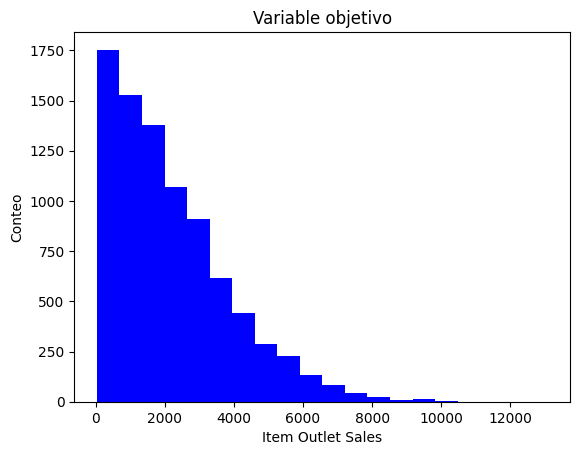

In [51]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'blue')

# Extraemos todos los valores de ventas de los productos del grupo de entrenamiento. Es decir, 
# los datos de la columnas 'Item_Outlet_Sales' 
# La cantidad de barras para este gráfico será de 20. 
# El color de las barras será azul. 

plt.title('Variable objetivo')
plt.xlabel('Item Outlet Sales') # Cantidad de artículos vendidos
plt.ylabel('Conteo')
plt.show()

In [52]:
#Veremos las columnas del dataset de entrenamiento
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [12]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [53]:
#Ver los elementos en la columnas "Item_Identifier"
train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

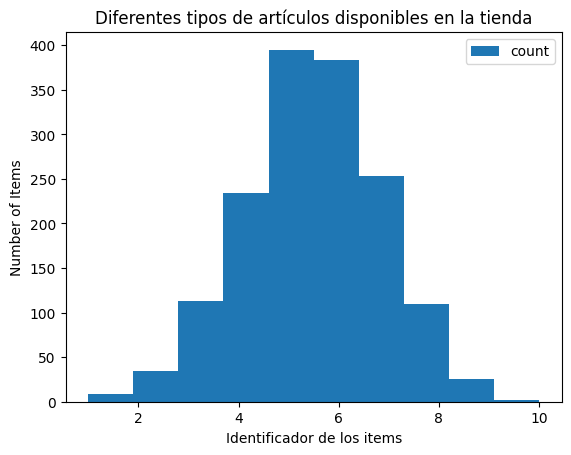

In [54]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Diferentes tipos de artículos disponibles en la tienda')
plt.xlabel('Identificador de los items')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [55]:
#Items en la columna 'Item_Fat_Content' 
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

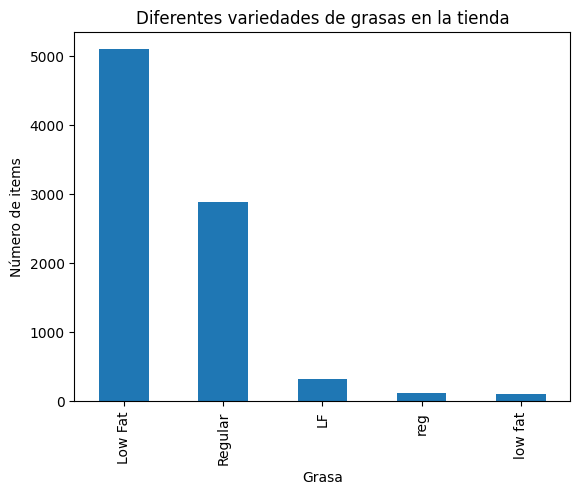

In [56]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Diferentes variedades de grasas en la tienda')
plt.xlabel('Grasa')
plt.ylabel('Número de items')
plt.show()

In [57]:
#Items en la columna 'Item_Type'
train['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

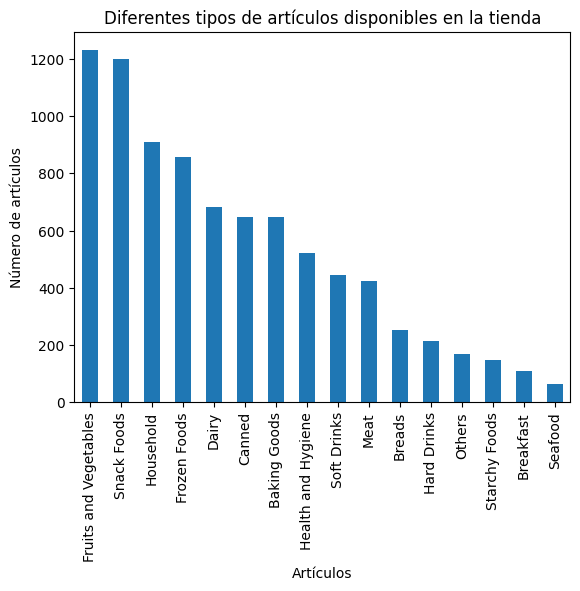

In [58]:
# Ánalizando los elementos en el dataset de entrenamiento de la columna 'Item_Type'

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Diferentes tipos de artículos disponibles en la tienda')
plt.xlabel('Artículos')
plt.ylabel('Número de artículos')
plt.show()

In [59]:
# Items en la columna 'Outlet_Identifier'

train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

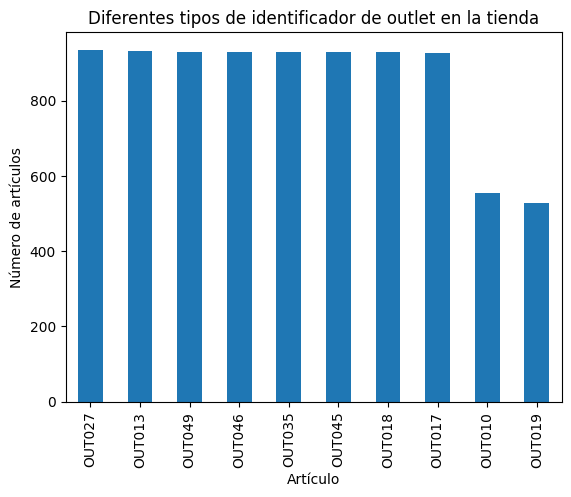

In [60]:
# Ánalizando los elementos en el dataset de entrenamiento de la columna 'Outlet_Identifier'

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Diferentes tipos de identificador de outlet en la tienda')
plt.xlabel('Artículo')
plt.ylabel('Número de artículos')
plt.show()

In [61]:
# Items en la columna 'Outlet_Size'

train['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

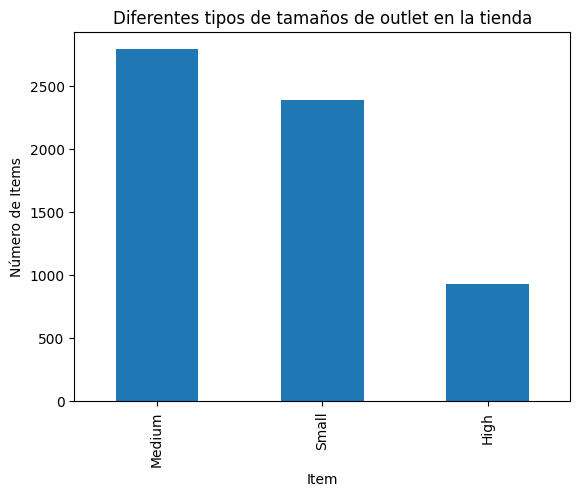

In [62]:
# Ánalizando los elementos en el dataset de entrenamiento de la columna 'Outlet_Size'

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Diferentes tipos de tamaños de outlet en la tienda')
plt.xlabel('Item')
plt.ylabel('Número de Items')
plt.show()
     


In [63]:
# Items en la columna 'Outlet_Location_Type'

train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

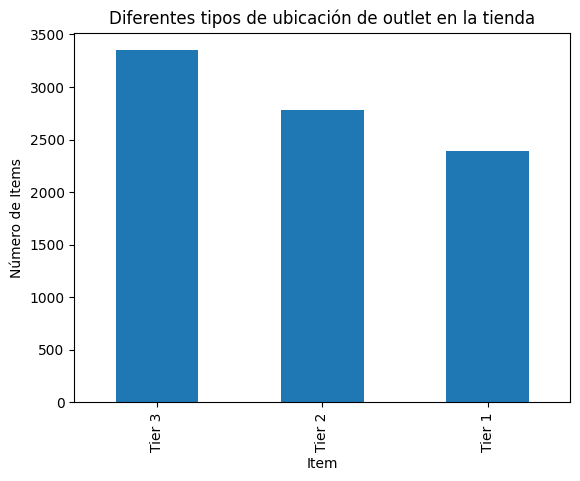

In [64]:
# Ánalizando los elementos en el dataset de entrenamiento de la columna 'Outlet_Location_Type'

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Diferentes tipos de ubicación de outlet en la tienda')
plt.xlabel('Item')
plt.ylabel('Número de Items')
plt.show()

In [65]:
# Items en la columna 'Outlet_Type'

train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

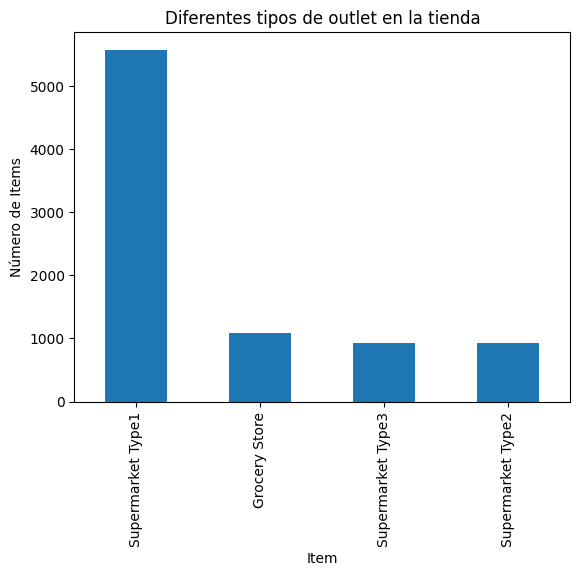

In [66]:
# Ánalizando los elementos en el dataset de entrenamiento de la columna 'Outlet_Type'

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Diferentes tipos de outlet en la tienda')
plt.xlabel('Item')
plt.ylabel('Número de Items')
plt.show()

<Axes: xlabel='Item_Fat_Content'>

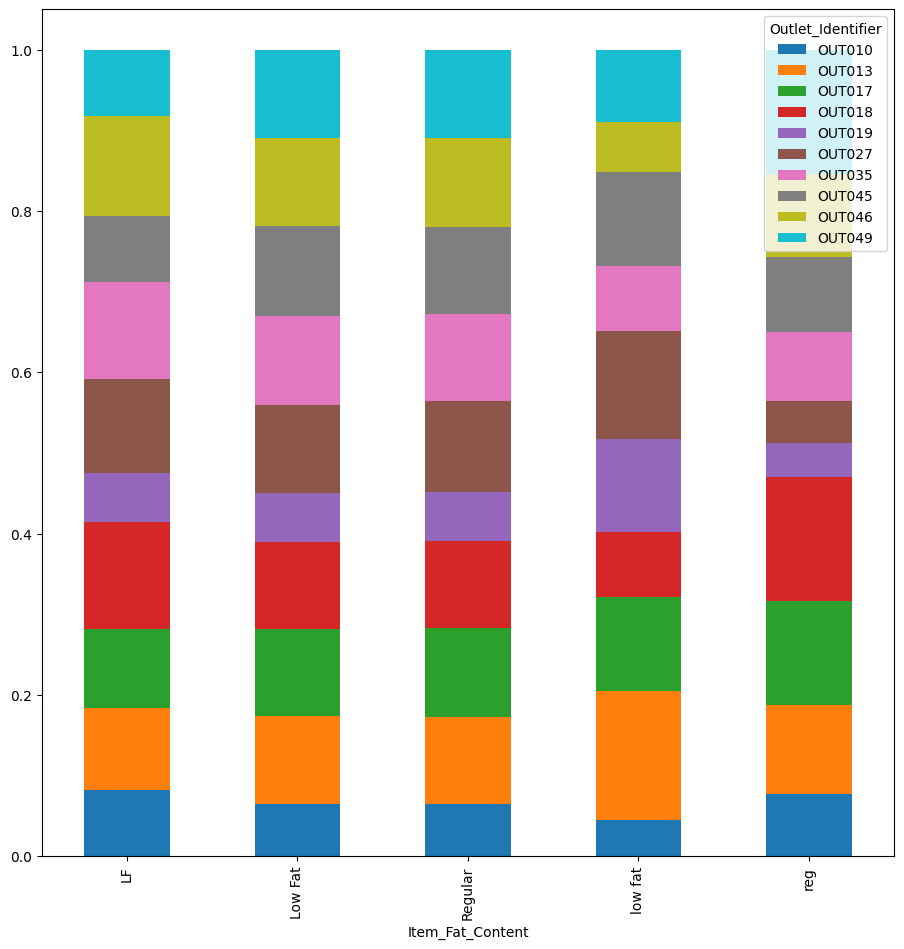

In [67]:
# Contenido de grasa vs Identificador de un outlet

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<Axes: xlabel='Item_Type'>

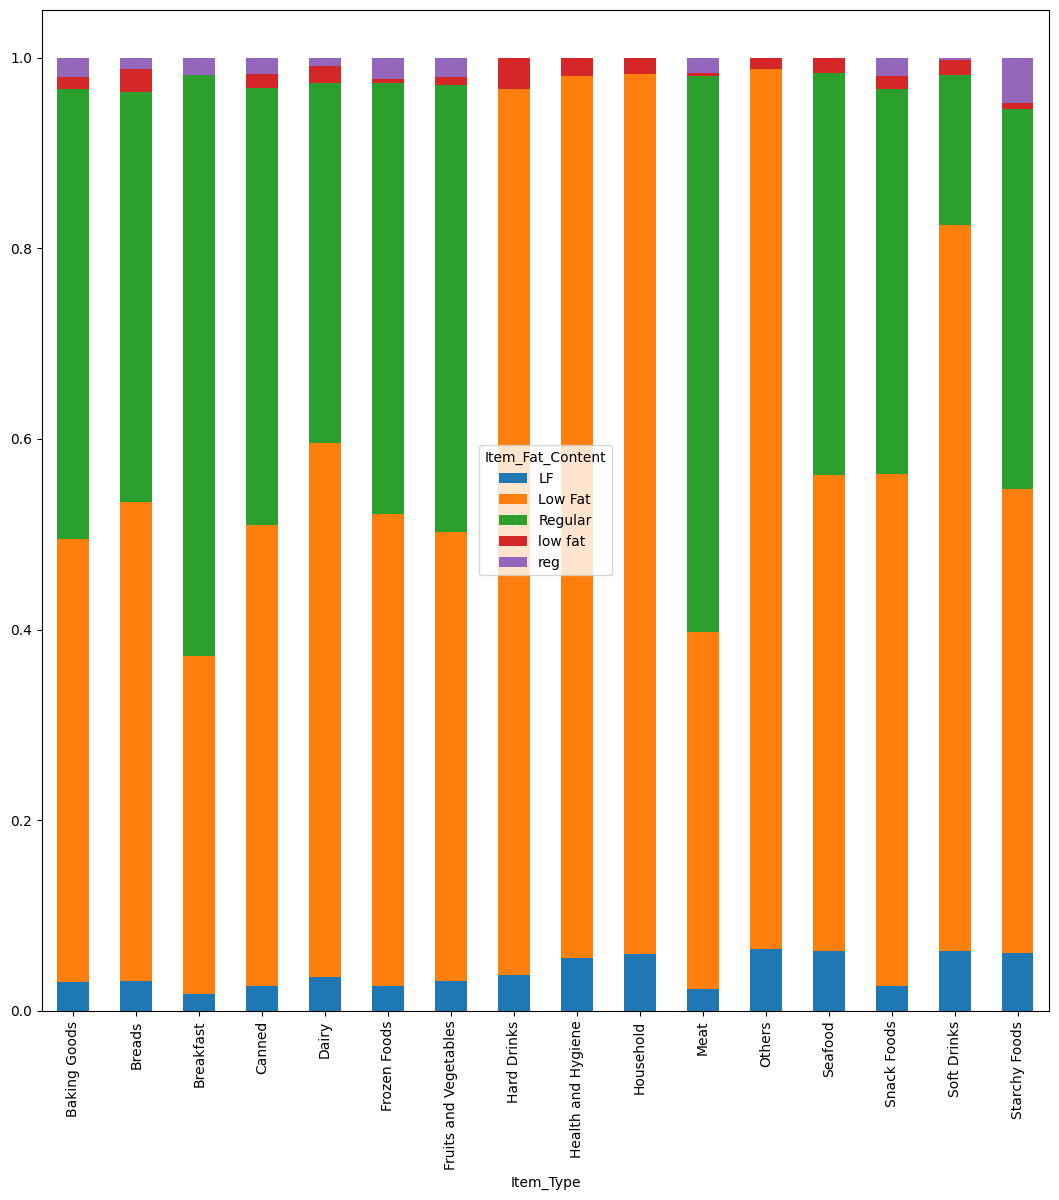

In [68]:
# Contenido de grasa vs Tipo de Item

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


PREPROCESAMIENTO

In [69]:
# Verificando los valores únicos en las columnas del conjunto de datos de entrenamiento

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [70]:
data.isnull().sum() 

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [71]:
# Imputación o sustitución de datos faltantes.

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()
     

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
# Reemplazando nombres de los elementos. 


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [73]:
# Reemplazar las dos primeras letras de cada identificador por el nombre de la categoría

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Item_Identifier
Food              10201
Non_Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [74]:
# Determinar la operación en un periodo de tiempo

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

Outlet_Years
28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: count, dtype: int64

In [ ]:
# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

In [75]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [79]:
# Label encoding

from sklearn.preprocessing  import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [80]:
# One Hot Encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [81]:
# Dividir los datos en variables dependientes e independientes

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)
     

(14204, 46)
(14204,)


In [82]:
# Dividir el conjunto de datos unificado en entrenamiento y prueba

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [83]:
# x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(9942, 46)
(9942,)
(4262, 46)
(4262,)


# Modelamiento

In [89]:
#GLM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, PoissonRegressor, TweedieRegressor

parameters = {'GLM: Linear': {'alpha': 10 ** np.arange(-4., 1.)},
              'GLM: Poisson': {'alpha': 10 ** np.arange(-4., 1.)},
              'GLM: Tweedie': {'alpha': 10 ** np.arange(-4., 1.), 
                               'power': np.linspace(1.1, 1.9, num=5)}}

glms = {'GLM: Linear': Ridge(),
        'GLM: Poisson': PoissonRegressor(max_iter=20000), 
        'GLM: Tweedie': TweedieRegressor(max_iter=20000)}

best_glms = {}
results = pd.DataFrame()

for glm_type, glm in glms.items():
    param_tuner = GridSearchCV(glm, parameters[glm_type], cv=5, refit=True, verbose=2)
    param_tuner.fit(x_train, y_train)
    
    best_glms[glm_type] = param_tuner.best_estimator_
    ypred_trn = best_glms[glm_type].predict(x_train)
    ypred_tst = best_glms[glm_type].predict(x_test)
    
    res = {'Method': glm_type, 
            'Train MSE': mean_squared_error(y_train, ypred_trn),
            'Train MAE': mean_absolute_error(y_train, ypred_trn), 
            'Train R2': r2_score(y_train, ypred_trn), 
            'Test MSE': mean_squared_error(y_test, ypred_tst),
            'Test MAE': mean_absolute_error(y_test, ypred_tst),
            'Test R2': r2_score(y_test, ypred_tst)}
    
    results = pd.concat([results, pd.DataFrame([res])], ignore_index=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

In [90]:
results

,Method,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,GLM: Linear,1.512988e+06,896.776062,0.281904,1.516403e+06,895.447849,0.278937
1,GLM: Poisson,1.488358e+06,870.785005,0.293594,1.486886e+06,866.436423,0.292972
2,GLM: Tweedie,1.492774e+06,870.032458,0.291498,1.492546e+06,866.454481,0.290281


In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

base_estimators = list(best_glms.items())
meta_learner = MLPRegressor(hidden_layer_sizes=(25, 25, 25), max_iter=1000, activation='relu')
stack = StackingRegressor(base_estimators, final_estimator=meta_learner)
stack.fit(x_train, y_train)

ypred_trn = stack.predict(x_train)
ypred_tst = stack.predict(x_test)
    
res = {'Method': 'GLM Stack', 
        'Train MSE': mean_squared_error(y_train, ypred_trn),
        'Train MAE': mean_absolute_error(y_train, ypred_trn), 
        'Train R2': r2_score(y_train, ypred_trn), 
        'Test MSE': mean_squared_error(y_test, ypred_tst),
        'Test MAE': mean_absolute_error(y_test, ypred_tst),
        'Test R2': r2_score(y_test, ypred_tst)}

results = pd.concat([results, pd.DataFrame([res])], ignore_index=True)

In [92]:
results

,Method,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,GLM: Linear,1.512988e+06,896.776062,0.281904,1.516403e+06,895.447849,0.278937
1,GLM: Poisson,1.488358e+06,870.785005,0.293594,1.486886e+06,866.436423,0.292972
2,GLM: Tweedie,1.492774e+06,870.032458,0.291498,1.492546e+06,866.454481,0.290281
3,GLM Stack,1.486720e+06,877.823206,0.294371,1.488022e+06,875.335070,0.292432


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

parameters = {'n_estimators': np.arange(200, 600, step=100), 
              'max_depth': np.arange(4, 7, step=1)}

print(parameters)
ensembles = {'RF: Squared Error': RandomForestRegressor(criterion='squared_error'),
             'RF: Poisson': RandomForestRegressor(criterion='poisson'),
             'XT: Squared Error': ExtraTreesRegressor(criterion='squared_error'), 
             'XT: Poisson': ExtraTreesRegressor(criterion='poisson')}
             
for ens_type, ensemble in ensembles.items():
    param_tuner = GridSearchCV(ensemble, parameters, cv=5, refit=True, verbose=2)
    param_tuner.fit(x_train, y_train)
        
    ypred_trn = param_tuner.best_estimator_.predict(x_train)
    ypred_tst = param_tuner.best_estimator_.predict(x_test)
    
    res = {'Method': ens_type, 
            'Train MSE': mean_squared_error(y_train, ypred_trn),
            'Train MAE': mean_absolute_error(y_train, ypred_trn), 
            'Train R2': r2_score(ytrn, ypred_trn), 
            'Test MSE': mean_squared_error(ytst, ypred_tst),
            'Test MAE': mean_absolute_error(ytst, ypred_tst),
            'Test R2': r2_score(ytst, ypred_tst)}
    
    results = pd.concat([results, pd.DataFrame([res])], ignore_index=True)